In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('tsa_claims1.csv', low_memory=False)

In [14]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


### Most common type of insurance claim

In [37]:
df['Claim Type'].value_counts().idxmax()

'Passenger Property Loss'

### Most commonly filed claim site

In [21]:
df['Claim Site'].value_counts().idxmax()

'Checked Baggage'

In [39]:
median_claim = df['Claim Amount'].median()
mean_claim = df['Claim Amount'].mean()

print(f"The median claim amount is ${median_claim:.2f}")
print(f"The mean claim amount is ${mean_claim:.2f}")

The median claim amount is $183.69
The mean claim amount is $3634.83


In [35]:
# Calculate the total number of claims
total_claims = len(df)

# Calculate the number of approved or settled claims
approved_claims = df[df['Status'].isin(['Approved', 'Settled'])]

# Calculate the approval rate
approval_rate = len(approved_claims) / total_claims * 100

print(f"The overall claim approval rate is {approval_rate:.2f}%")


The overall claim approval rate is 43.83%


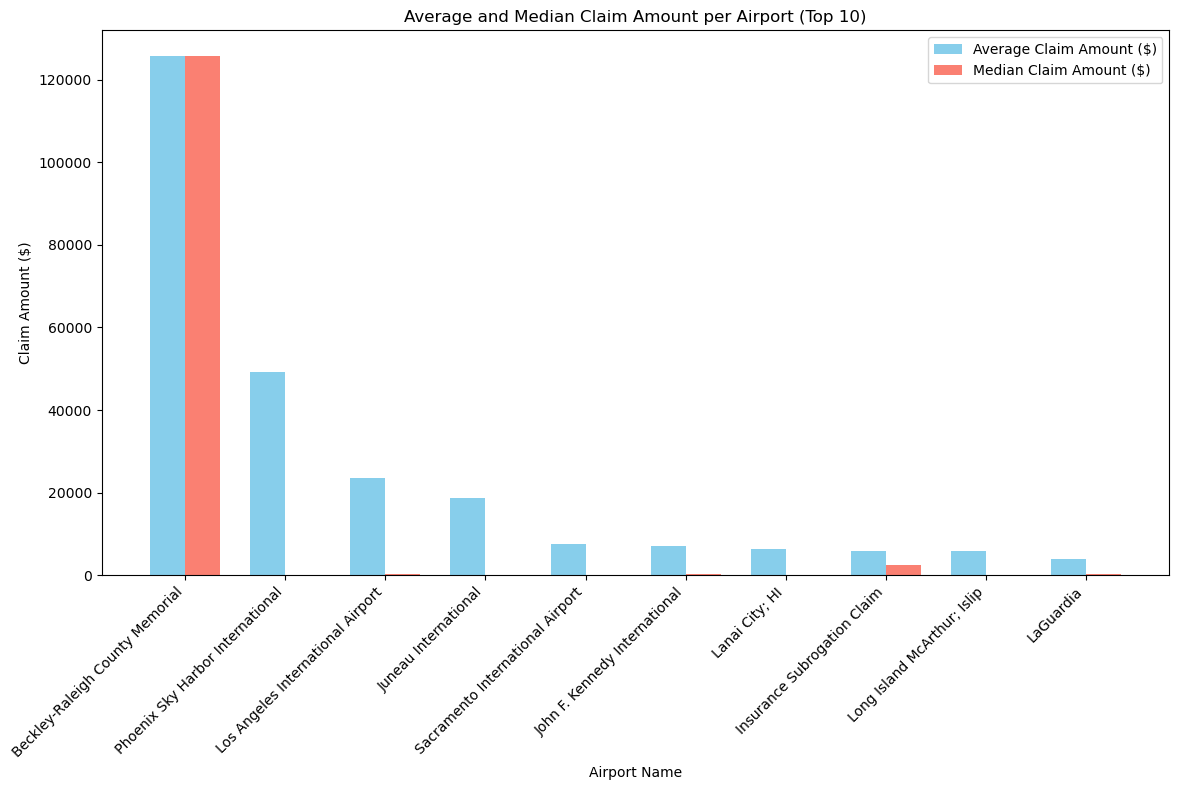

In [54]:
# Calculate the average (mean) and median claim amount per airport
average_claims = df.groupby('Airport Name')['Claim Amount'].agg(['mean', 'median']).reset_index()

# Rename columns for clarity
average_claims.columns = ['Airport Name', 'Average Claim Amount ($)', 'Median Claim Amount ($)']

# Sort the data by average claim amount in descending order
average_claims = average_claims.sort_values(by='Average Claim Amount ($)', ascending=False)

# Top 10 airports based on average claim amount
top_airports = average_claims.head(10)

# Plot the average and median claim amounts
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(top_airports))

# Bar plots for average and median
plt.bar(index, top_airports['Average Claim Amount ($)'], width=bar_width, label='Average Claim Amount ($)', color='skyblue')
plt.bar([i + bar_width for i in index], top_airports['Median Claim Amount ($)'], width=bar_width, label='Median Claim Amount ($)', color='salmon')

# Adding labels and title
plt.xlabel('Airport Name')
plt.ylabel('Claim Amount ($)')
plt.title('Average and Median Claim Amount per Airport (Top 10)')
plt.xticks([i + bar_width / 2 for i in index], top_airports['Airport Name'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()